# **Smart Heart Rate and Blood Oxygen Monitoring System using Machine Learning Algorithm.**

# Package Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Dataset Reading

In [ ]:
data = pd.read_csv("/content/Human_vital_signs_R.csv")
data

,Unnamed: 0,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,0,94.0,21.0,97.0,36.2,Normal
1,1,1,94.0,25.0,97.0,36.2,Normal
2,2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...,...
25309,476,476,56.0,12.0,101.0,33.0,Abnormal
25310,477,477,94.0,25.0,98.0,36.4,Normal
25311,478,478,94.0,21.0,97.0,36.2,Normal
25312,479,479,93.0,27.0,95.0,37.0,Normal


# Data PreProcessing

In [ ]:
data.head()

,Unnamed: 0,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,0,94.0,21.0,97.0,36.2,Normal
1,1,1,94.0,25.0,97.0,36.2,Normal
2,2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,4,93.0,26.0,95.0,37.0,Normal


In [ ]:
data = data.drop(columns=['Time (s)', ' RESP (BPM)']) # Bỏ trường không cần thiết

In [ ]:
data.tail()

,Unnamed: 0,HR (BPM),SpO2 (%),TEMP (*C),OUTPUT
25309,476,56.0,101.0,33.0,Abnormal
25310,477,94.0,98.0,36.4,Normal
25311,478,94.0,97.0,36.2,Normal
25312,479,93.0,95.0,37.0,Normal
25313,480,102.0,92.0,37.0,Abnormal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25314 entries, 0 to 25313
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25314 non-null  int64  
 1    HR (BPM)   25309 non-null  float64
 2    SpO2 (%)   25302 non-null  float64
 3   TEMP (*C)   25314 non-null  float64
 4   OUTPUT      25314 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 989.0+ KB


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
HR (BPM),5
SpO2 (%),12
TEMP (*C),0
OUTPUT,0


In [ ]:
data['OUTPUT'].value_counts()

,count
OUTPUT,
Abnormal,19531
Normal,5783


In [ ]:
data.shape

(25314, 5)

In [ ]:
# Tách đặc trưng (features) và nhãn mục tiêu (target)
X = data[[' HR (BPM)', ' SpO2 (%)', 'TEMP (*C)']]  # Đặc trưng
y = data['OUTPUT']  # Nhãn mục tiêu

In [ ]:
# Chuyển đổi nhãn mục tiêu từ dạng chuỗi (Normal/Abnormal) sang số (0/1)
y = y.map({'Normal': 0, 'Abnormal': 1})

# Data Visualization

In [ ]:
"""print(data.columns)
plt.bar(data['Time (s)'], data[' HR (BPM)'])
plt.title("Bar Chart of Temperature Data ")
plt.xlabel('Time(s)')
plt.ylabel('HR (BPM)')
plt.show()"""

'print(data.columns)\nplt.bar(data[\'Time (s)\'], data[\' HR (BPM)\'])\nplt.title("Bar Chart of Temperature Data ")\nplt.xlabel(\'Time(s)\')\nplt.ylabel(\'HR (BPM)\')\nplt.show()'

In [ ]:
"""plt.bar(data['Time (s)'],data[' RESP (BPM)'])
plt.title("Bar Chart of ECG Data")
plt.xlabel('Time(s)')
plt.ylabel('RESP (BPM)')
plt.show()"""

'plt.bar(data[\'Time (s)\'],data[\' RESP (BPM)\'])\nplt.title("Bar Chart of ECG Data")\nplt.xlabel(\'Time(s)\')\nplt.ylabel(\'RESP (BPM)\')\nplt.show()'

In [ ]:
"""plt.bar(data['Time (s)'],data[' SpO2 (%)'])
plt.title("Bar Chart of Pressure Data")
plt.xlabel('Time (s)')
plt.ylabel('SpO2 (%)')
plt.show()"""

'plt.bar(data[\'Time (s)\'],data[\' SpO2 (%)\'])\nplt.title("Bar Chart of Pressure Data")\nplt.xlabel(\'Time (s)\')\nplt.ylabel(\'SpO2 (%)\')\nplt.show()'

In [ ]:
"""plt.bar(data['Patient ID'],data['Target'])
plt.title("Bar Chart of Targeted Data")
plt.xlabel('Patient ID')
plt.ylabel('Targeted Data')
plt.show()"""

'plt.bar(data[\'Patient ID\'],data[\'Target\'])\nplt.title("Bar Chart of Targeted Data")\nplt.xlabel(\'Patient ID\')\nplt.ylabel(\'Targeted Data\')\nplt.show()'

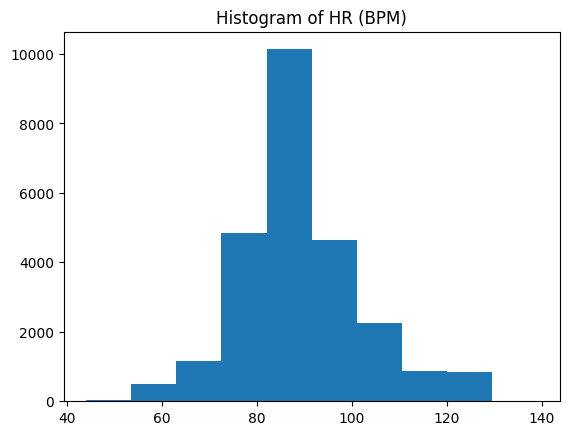

In [ ]:
plt.hist(data[' HR (BPM)'])
plt.title("Histogram of HR (BPM)")
plt.show()

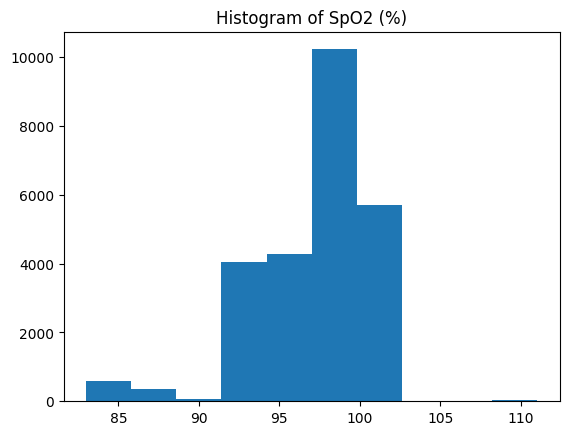

In [ ]:
plt.hist(data[' SpO2 (%)'])
plt.title("Histogram of SpO2 (%)")
plt.show()

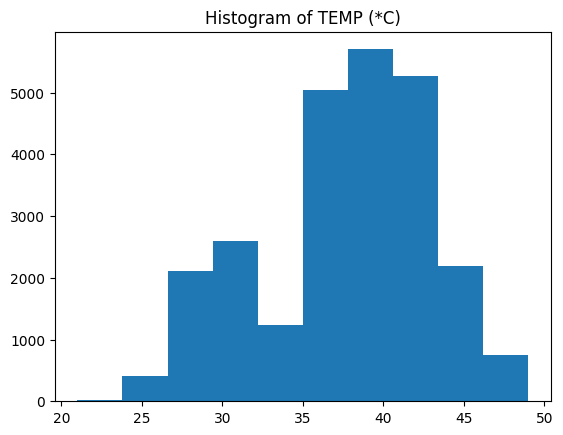

In [ ]:
plt.hist(data['TEMP (*C)'])
plt.title("Histogram of TEMP (*C)")
plt.show()

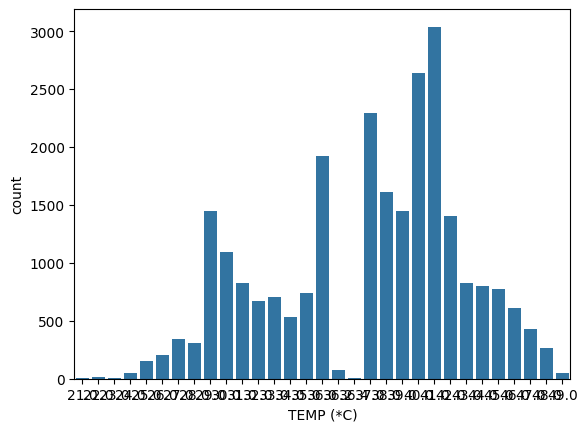

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='TEMP (*C)', data = data)

# Show the plot
plt.show()

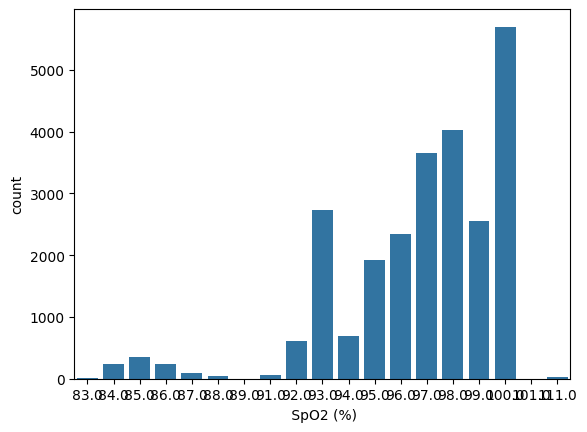

In [ ]:
# count plot on single categorical variable
sns.countplot(x =' SpO2 (%)', data = data)

# Show the plot
plt.show()

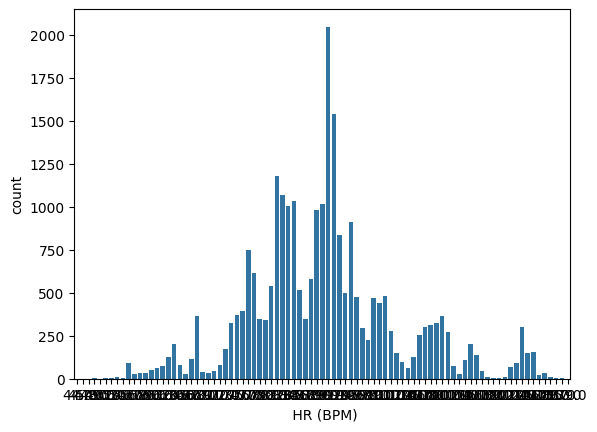

In [ ]:
# count plot on single categorical variable
sns.countplot(x =' HR (BPM)', data = data)

# Show the plot
plt.show()

<Axes: xlabel=' HR (BPM)', ylabel='Density'>

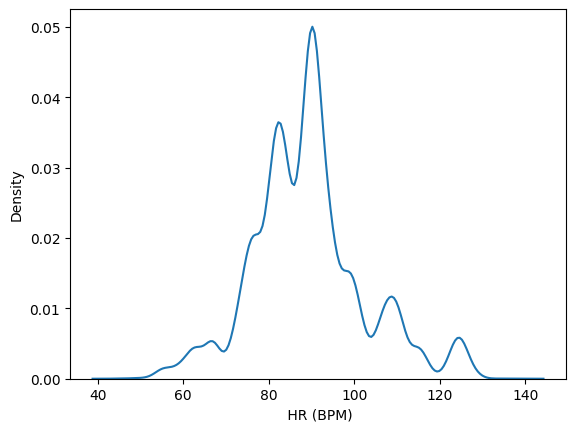

In [ ]:
sns.kdeplot(data[' HR (BPM)'])

<Axes: xlabel=' SpO2 (%)', ylabel='Density'>

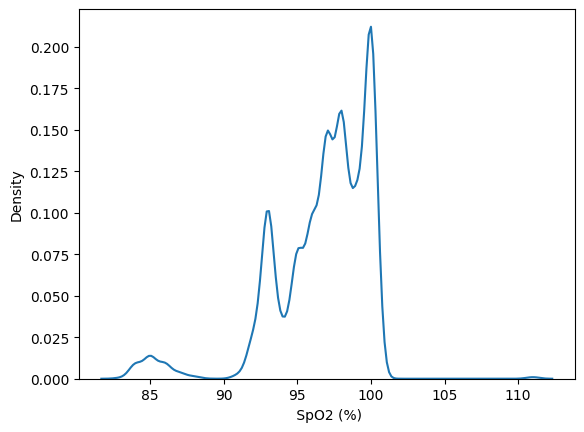

In [ ]:
sns.kdeplot(data[' SpO2 (%)'])

<Axes: xlabel='TEMP (*C)', ylabel='Density'>

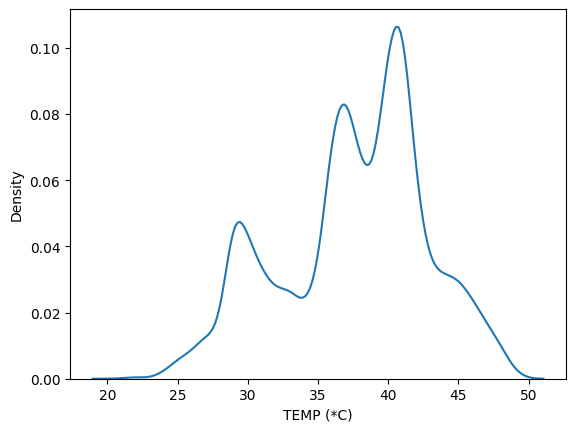

In [ ]:
sns.kdeplot(data['TEMP (*C)'])

<Axes: >

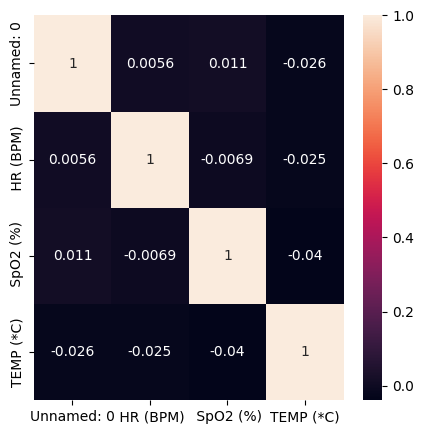

In [ ]:
# Convert ' HR (BPM)' column to numeric, handling errors
data[' HR (BPM)'] = pd.to_numeric(data[' HR (BPM)'], errors='coerce')

# Drop rows with missing values (introduced by errors='coerce')
data = data.dropna()

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
corr = numerical_data.corr()

# Create and display the heatmap
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

# Model Implementation

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Chuẩn hóa dữ liệu (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Khởi tạo mô hình XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
"""# Test
new_data = {
    'HR (BPM)': [94, 93, 92],
    'SpO2 (%)': [98, 97, 97],
    'TEMP (*C)': [42, 41, 30]
}

# Tạo DataFrame từ dữ liệu mới
new_df = pd.DataFrame(new_data)

# Chuẩn hóa dữ liệu mới
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)

# Dự đoán bằng mô hình đã huấn luyện
predictions = model.predict(new_df_scaled)

# Chuyển đổi kết quả dự đoán thành nhãn
predicted_labels = ['Normal' if pred == 0 else 'Abnormal' for pred in predictions]

# Tạo DataFrame để hiển thị kết quả dự đoán
results = pd.DataFrame(new_data)
results['Predicted Output'] = predicted_labels

print(results)"""

"# Test\nnew_data = {\n    'HR (BPM)': [94, 93, 92],  \n    'SpO2 (%)': [98, 97, 97],    \n    'TEMP (*C)': [42, 41, 30] \n}\n\n# Tạo DataFrame từ dữ liệu mới\nnew_df = pd.DataFrame(new_data)\n\n# Chuẩn hóa dữ liệu mới\nscaler = StandardScaler()\nnew_df_scaled = scaler.fit_transform(new_df)\n\n# Dự đoán bằng mô hình đã huấn luyện\npredictions = model.predict(new_df_scaled)\n\n# Chuyển đổi kết quả dự đoán thành nhãn\npredicted_labels = ['Normal' if pred == 0 else 'Abnormal' for pred in predictions]\n\n# Tạo DataFrame để hiển thị kết quả dự đoán\nresults = pd.DataFrame(new_data)\nresults['Predicted Output'] = predicted_labels\n\nprint(results)"

In [ ]:
import joblib

# Lưu mô hình
joblib.dump(model, 'smart_health_model.joblib')

['smart_health_model.joblib']

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

# Lưu scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [ ]:
# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9956547501481335
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1166
           1       1.00      1.00      1.00      3897

    accuracy                           1.00      5063
   macro avg       0.99      0.99      0.99      5063
weighted avg       1.00      1.00      1.00      5063



#  Naive Bayes Algorithm

In [ ]:
"""from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
NB_Algorithm = MultinomialNB()
NB_Algorithm.fit(x_train1, y_train1)
NB_Algorithm_Prediction = NB_Algorithm.predict(x_test1)
Accuracy_NB = metrics.accuracy_score(y_test1, NB_Algorithm_Prediction)
print('Accuracy of Naive Bayes Algorithm', Accuracy_NB)"""

"from sklearn.naive_bayes import MultinomialNB\nfrom sklearn import metrics\nNB_Algorithm = MultinomialNB()\nNB_Algorithm.fit(x_train1, y_train1)\nNB_Algorithm_Prediction = NB_Algorithm.predict(x_test1)\nAccuracy_NB = metrics.accuracy_score(y_test1, NB_Algorithm_Prediction)\nprint('Accuracy of Naive Bayes Algorithm', Accuracy_NB)"

In [ ]:
#NB_Algorithm_Prediction

# Classification report and Confusion matrix of Naive Bayes Algorithm

In [ ]:
"""from sklearn.metrics import classification_report, confusion_matrix
CM_NB=confusion_matrix(y_test1, NB_Algorithm_Prediction)
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, NB_Algorithm_Prediction))"""

"from sklearn.metrics import classification_report, confusion_matrix\nCM_NB=confusion_matrix(y_test1, NB_Algorithm_Prediction)\nsns.heatmap(CM_NB, annot=True, fmt='d', cmap='YlGnBu')\nprint(classification_report(y_test1, NB_Algorithm_Prediction))"

# Decision Tree Algorithm

In [ ]:
"""from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_Algorithm = DecisionTreeClassifier()
DT_Algorithm.fit(x_train1, y_train1)
DT_Algorithm_Prediction = DT_Algorithm.predict(x_test1)
Accuracy_DT = accuracy_score(y_test1, DT_Algorithm_Prediction)
print('Accuracy of Decision Tree Algorithm', Accuracy_DT)"""

"from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score\nDT_Algorithm = DecisionTreeClassifier()\nDT_Algorithm.fit(x_train1, y_train1)\nDT_Algorithm_Prediction = DT_Algorithm.predict(x_test1)\nAccuracy_DT = accuracy_score(y_test1, DT_Algorithm_Prediction)\nprint('Accuracy of Decision Tree Algorithm', Accuracy_DT)"

In [ ]:
#DT_Algorithm_Prediction

# Classification report and Confusion matrix of Decision Tree Algorithm

In [ ]:
"""from sklearn.metrics import classification_report, confusion_matrix
CM_DT=confusion_matrix(y_test1, DT_Algorithm_Prediction)
sns.heatmap(CM_DT, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, DT_Algorithm_Prediction))"""

"from sklearn.metrics import classification_report, confusion_matrix\nCM_DT=confusion_matrix(y_test1, DT_Algorithm_Prediction)\nsns.heatmap(CM_DT, annot=True, fmt='d', cmap='YlGnBu')\nprint(classification_report(y_test1, DT_Algorithm_Prediction))"

# Logistic Regression Algorithm

In [ ]:
"""from sklearn.linear_model import LogisticRegression
LR_Algorithm = LogisticRegression()
LR_Algorithm.fit(x_train1, y_train1)
LR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)
Accuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Logistic Regression Algorithm', Accuracy_LR)"""

"from sklearn.linear_model import LogisticRegression\nLR_Algorithm = LogisticRegression()\nLR_Algorithm.fit(x_train1, y_train1)\nLR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)\nAccuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)\nprint('Accuracy of Logistic Regression Algorithm', Accuracy_LR)"

In [ ]:
#LR_Algorithm_Prediction

# Classification report and Confusion matrix of Logistic Regression Algorithm

In [ ]:
"""from sklearn.metrics import classification_report, confusion_matrix
CM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)
sns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, LR_Algorithm_Prediction))"""

"from sklearn.metrics import classification_report, confusion_matrix\nCM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)\nsns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')\nprint(classification_report(y_test1, LR_Algorithm_Prediction))"

# Support Vector Machine Algorithm

In [ ]:
"""from sklearn.svm import SVC
SVM_Algorithm = SVC()
SVM_Algorithm.fit(x_train1, y_train1)
SVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)
Accuracy_SVM = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)"""

"from sklearn.svm import SVC\nSVM_Algorithm = SVC()\nSVM_Algorithm.fit(x_train1, y_train1)\nSVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)\nAccuracy_SVM = accuracy_score(y_test1, LR_Algorithm_Prediction)\nprint('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)"

In [ ]:
#SVM_Algorithm_Prediction

# Classification report and Confusion matrix of Support Vector Machine Algorithm

In [ ]:
"""from sklearn.metrics import classification_report, confusion_matrix
CM_SVM=confusion_matrix(y_test1, SVM_Algorithm_Prediction)
sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, SVM_Algorithm_Prediction))"""

"from sklearn.metrics import classification_report, confusion_matrix\nCM_SVM=confusion_matrix(y_test1, SVM_Algorithm_Prediction)\nsns.heatmap(CM_SVM, annot=True, fmt='d', cmap='YlGnBu')\nprint(classification_report(y_test1, SVM_Algorithm_Prediction))"

# Comparison Plot of all the Graph

In [ ]:
"""model_accuracy = pd.Series(data=[Accuracy_NB,Accuracy_DT,Accuracy_LR,Accuracy_SVM],
                index=['Naive Bayes','Decision Tree','Logistic Regression','Support Vector Machine'])
fig= plt.figure(figsize=(5,5))
model_accuracy.sort_values().plot.barh()
plt.title('Comparison Graph of all the Algorithm')"""

"model_accuracy = pd.Series(data=[Accuracy_NB,Accuracy_DT,Accuracy_LR,Accuracy_SVM],\n                index=['Naive Bayes','Decision Tree','Logistic Regression','Support Vector Machine'])\nfig= plt.figure(figsize=(5,5))\nmodel_accuracy.sort_values().plot.barh()\nplt.title('Comparison Graph of all the Algorithm')"